In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import math
import seaborn as sns
import os
from collections import Counter
import sklearn
from sklearn.decomposition import PCA
from sklearn import metrics, preprocessing, neighbors, cluster
from sklearn import cluster
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])
%matplotlib inline
pd.set_option('display.max_columns', None)

In [64]:
df = pd.read_csv(r'C:\tools\project_data_s\Data-Research\Pull_Data.csv', encoding='utf-8')
df

,rest name,rest add,rest open,rest type,rest rank,reviews num,Chef Restaurant,Kosher restaurant,private room,Restaurant with free parking,Restaurant with a cellar of wines,Access to the disabled,Table time service,None,Restaurant bar,A rural restaurant,Sabbath -keeping business,A kosher restaurant for Mehadrin,Kosher Restaurant in the DC,Outdoor sitting option,Restaurant with regulated parking,Take away,Catering services,Access to public transport,Tutorials/workshops,A photo location,Events up to 100 people,"Sukkot, Tabernacles",Boutique events,Small events,Bar/Bat Mitzvah,Alliance/Alliance,Weddings,Team building days,birthdays,fun days,Marriage days,Seminars,Meetings,Conferences,Company parties,For press conferences,Department evenings,Exhibitions,Animal friendly,Deliveries,Chef to the house,An external garden,DOG Friendly,Wi-Fi,Open on Friday,Open in the USSR
0,"חצר עין כרם, עין כרם מדרגות הרומאים, ירושלים",ירושלים,א'-ה' 14:00-23:00\nו' 09:30-14:00,מסעדה חלבית,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"החשמונאים 7, בני ברק","החשמונאים 7, בני ברק",א'-ד' 14:00-23:00\nה' 13:00-02:00,מסעדת בשרים,5.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"זוקו - zoko by izidor segal, קריית אונו","שד' קק""ל 5, קריית אונו",א'-ה' 18:30-00:00,מסעדת בשרים,5.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3,"הלובי, בני ברק","לח""י 31, בני ברק",א'-ה' 08:30-17:00,מסעדה ים תיכונית,5.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"""המסעדה היהודית"", בני ברק","מצדה (כנרת) 4, בני ברק",א'-ה' 12:00-23:00\n\nשעות הפעילות של הגורמה:\n...,ביסטרו,4.5,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,"רג'ינה בתחנה, מתחם התחנה נווה צדק, תל אביב","המרד 3, תל אביב",א'-ה' 17:00-23:30\nו' 11:30-16:00\nש' 19:00-00:00,מסעדת בשרים,4.0,68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,"רונן בשרים, נתניה","שכטרמן 28, נתניה",א'-ה' 11:00-02:30\nש' חצי שעה אחרי צאת השבת-00:00,מסעדת בשרים,3.5,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"באביס - babbi's, אשדוד","הבנאים 3, אשדוד",א'-ה' 11:30-00:00\nש' שעה אחרי צאת השבת-00:00\...,מסעדת בשרים,3.5,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,"דגים ויין DONIS, גבעת שמואל","הערבה 1, גבעת שמואל",א'-ג' 12:00-23:00\nד'-ה' 12:00-00:00\nש' 19:30...,מסעדת דגים,3.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,"סארפסייד - SurfSide, תל אביב","הירקון 115, אבן גבירול, תל אביב",א'-ה' 18:00-23:00,מסעדת בשרים,3.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# df2 = df.drop("rest name", axis=1)
# scaler = StandardScaler()
# #dataset_scaled = scaler.fit_transform(df2)
# df2.hist(figsize = (50,50))

In [60]:
# import matplotlib.font_manager as fm

# # Get a list of available fonts
# font_list = fm.findSystemFonts()

# # Print the font names and their file paths
# for font_path in font_list:
#     font_prop = fm.FontProperties(fname=font_path)
#     print(font_prop.get_name(), font_path)

In [83]:
# # import matplotlib.pyplot as plt
# # import matplotlib.font_manager as fm
# # from sklearn.preprocessing import StandardScaler

# # Drop the "rest name" column
# df2 = df.drop("rest name", axis=1)

# # Exclude non-numeric columns
# numeric_columns = df2.select_dtypes(include='number').columns
# df_numeric = df2[numeric_columns]

# # Set the font properties for matplotlib
# font_path = 'C:\WINDOWS\Fonts\calibriz.ttf'  # Replace with the actual font file path
# font_prop = fm.FontProperties(fname=font_path)
# plt.rcParams['font.family'] = font_prop.get_name()

# # Scale the data
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# # Plot the histogram
# df_scaled.hist(figsize=(50, 50))


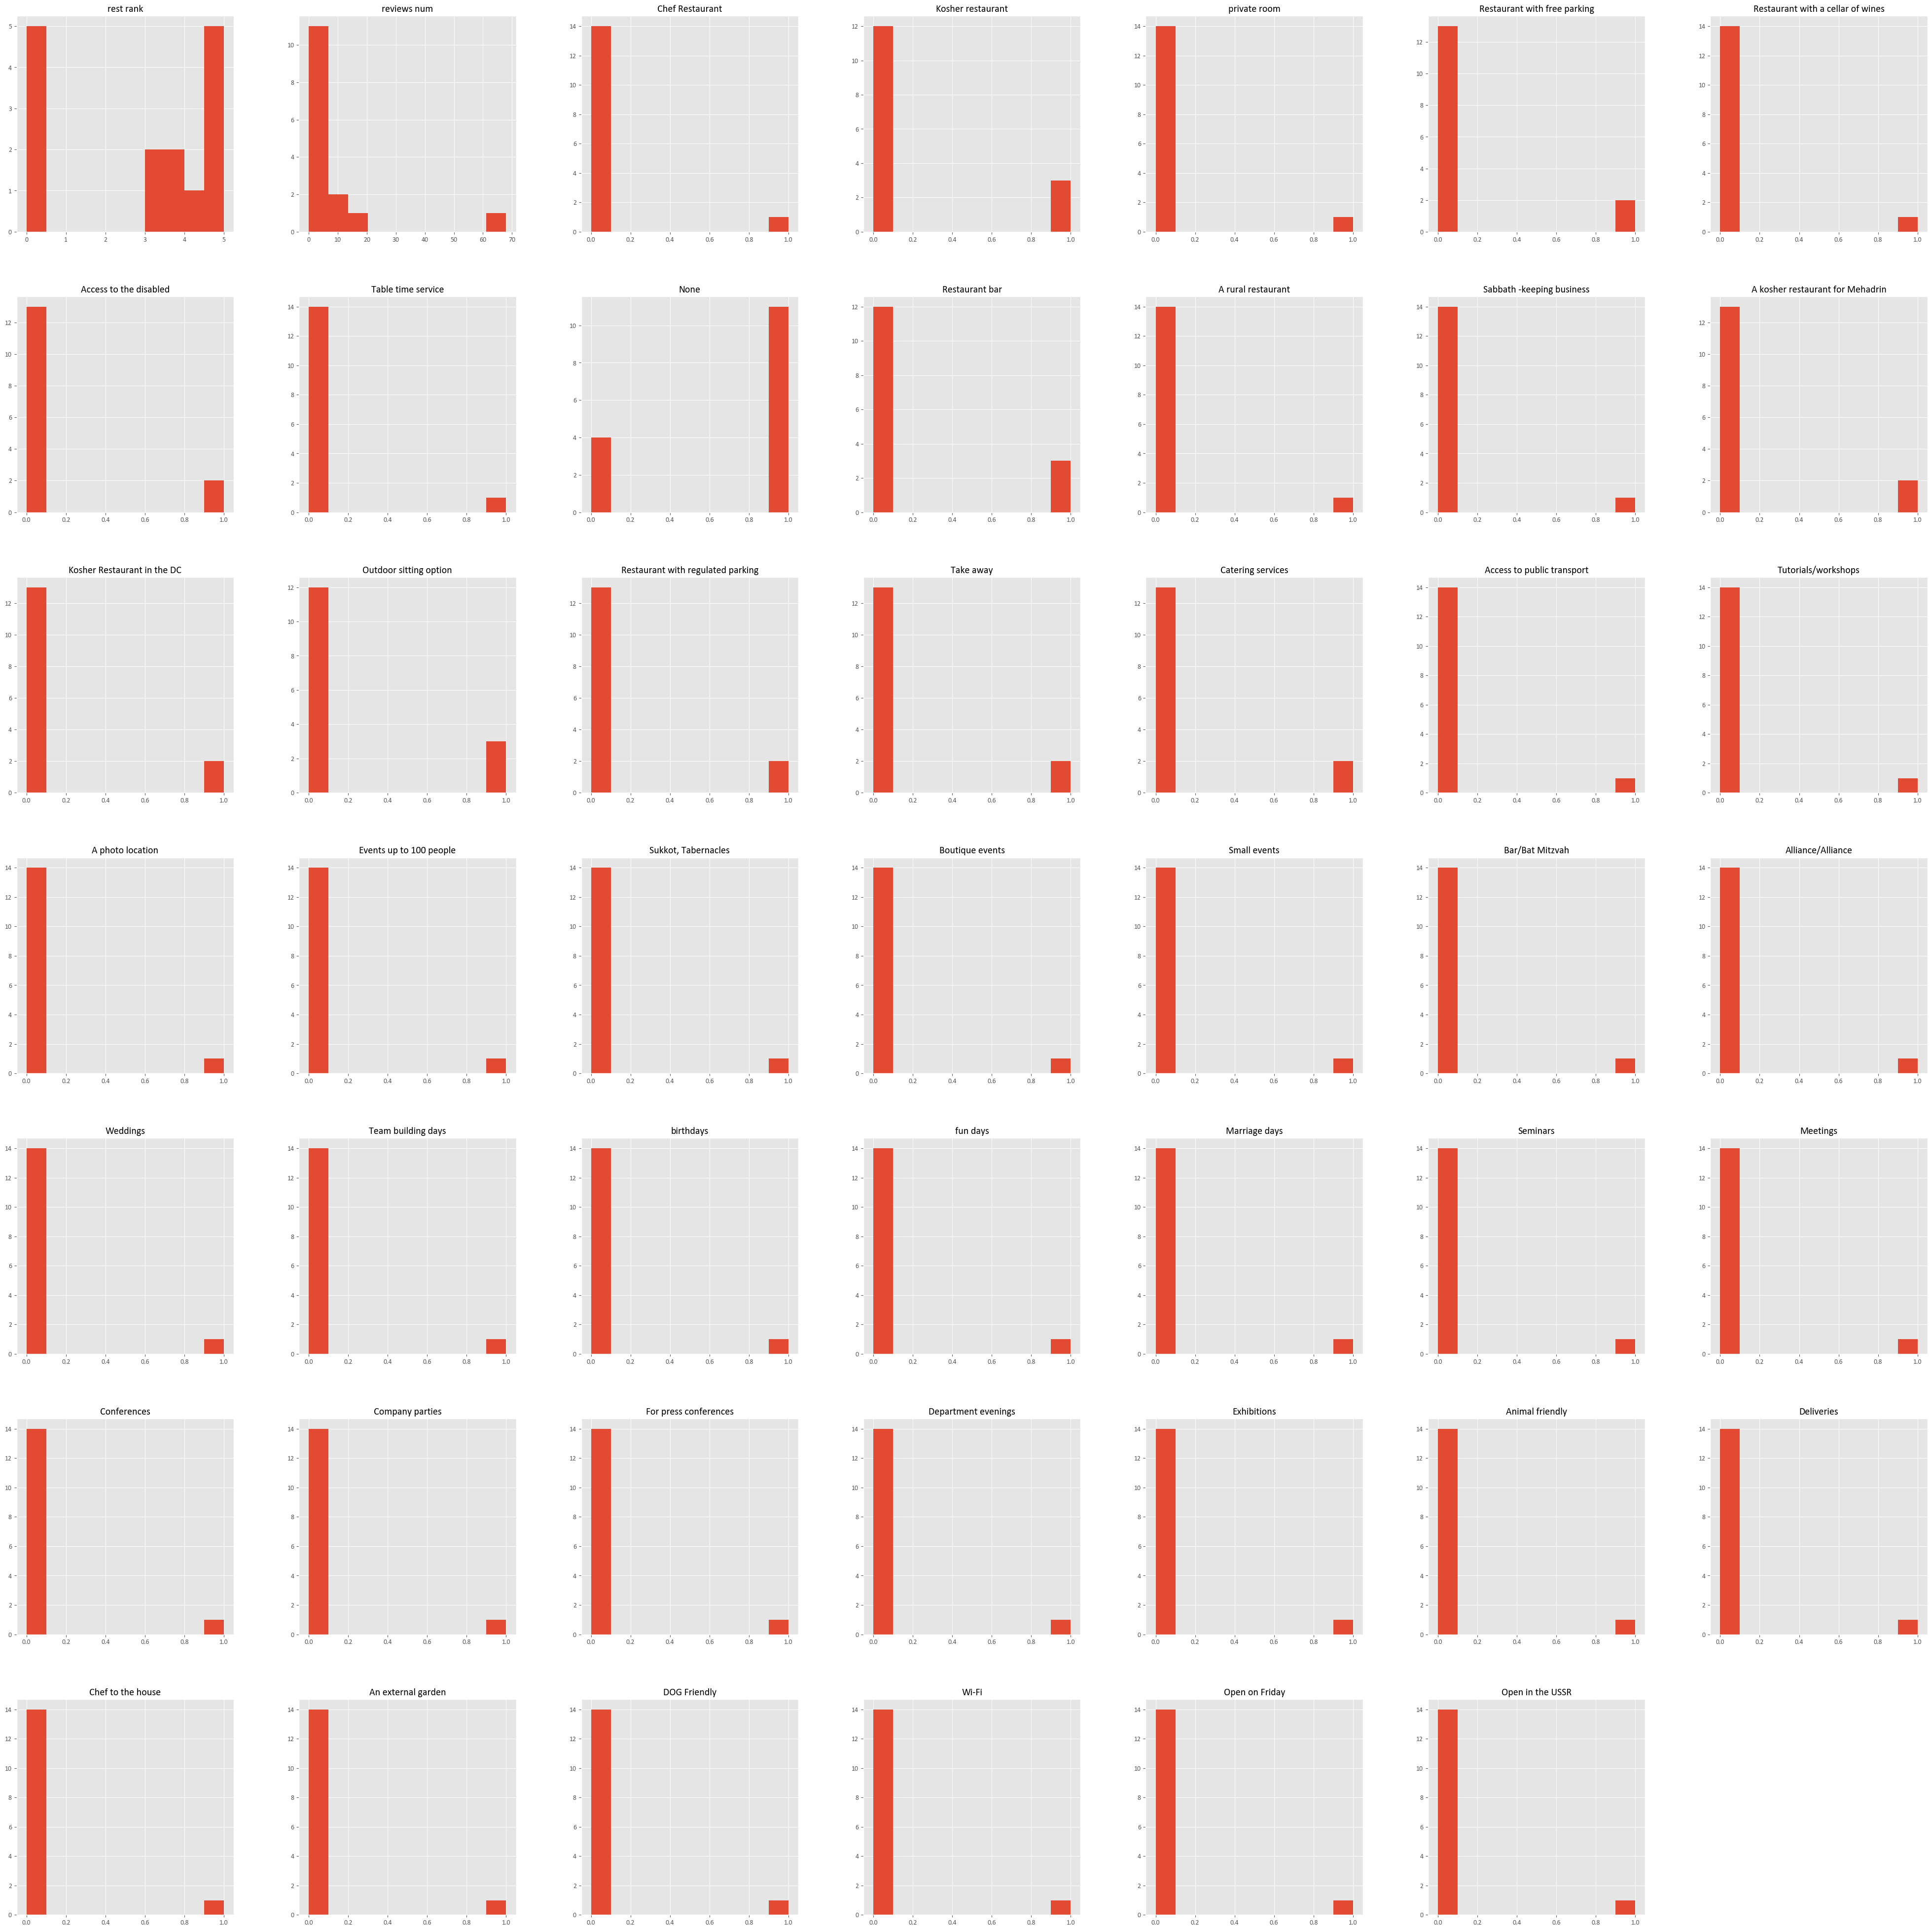

In [94]:
df2 = df.drop("rest name", axis=1)
rank_counts = df['rest name'].value_counts()
df2.hist(figsize=(50, 50))  # Set the figure size
plt.bar(rank_counts.index, rank_counts.values)  # Create the bar chart
plt.xlabel('Restaurant Rank')  # Set the x-axis label
plt.ylabel('Number of Restaurants')  # Set the y-axis label
plt.title('Distribution of Restaurant Ranks')  # Set the title
plt.show()  # Display the plot

<AxesSubplot:ylabel='rest rank'>

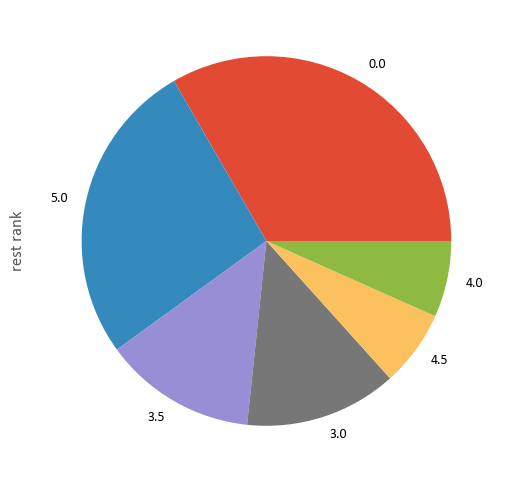

In [92]:
df['rest rank'].value_counts().plot(kind='pie')

<AxesSubplot:xlabel='rest rank'>

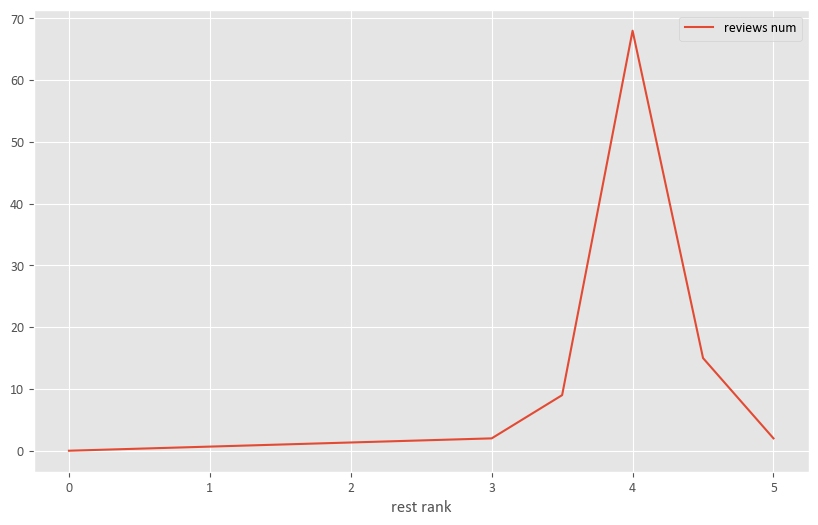

In [97]:
data=df.groupby(['rest rank']).mean()[['reviews num']]
data.plot()